In [1]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive")

Mounted at /content/gdrive
/content


In [3]:
#Importacion de los datos
dataset = pd.read_csv("insurance.csv", sep = ",")

In [4]:
#Vemos el dataset
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
dataset.shape

(1338, 7)

### One Hot Encoding

Primer paso, pasar columna'Sex' a numero

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc1 = OneHotEncoder(handle_unknown='ignore') #instanciando el objeto

In [8]:
enc1.fit(dataset[['sex']]) #Utilizando el metodo despues de haber creado el objeto

OneHotEncoder(handle_unknown='ignore')

In [9]:
enc1.categories_

[array(['female', 'male'], dtype=object)]

In [10]:
enc1.transform(dataset[['sex']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #instanciar el objeto
dataset["sex"] = encoder.fit_transform(dataset["sex"])

In [12]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


Segundo paso, pasar columna 'smoker' a numero

In [13]:
enc2 = OneHotEncoder(handle_unknown='ignore') #instanciando el objeto
enc2.fit(dataset[['smoker']]) #Utilizando el metodo despues de haber creado el objeto
enc2.transform(dataset[['smoker']]).toarray()
encoder = LabelEncoder() #instanciar el objeto
dataset["smoker"] = encoder.fit_transform(dataset["smoker"])

In [14]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Tercer paso, pasar columna 'region' a numero

In [15]:
enc3 = OneHotEncoder(handle_unknown='ignore') #instanciando el objeto
enc3.fit(dataset[['region']]) #Utilizando el metodo despues de haber creado el objeto
enc3.transform(dataset[['region']]).toarray()
encoder = LabelEncoder() #instanciar el objeto
dataset["region"] = encoder.fit_transform(dataset["region"])

In [16]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Model

In [17]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


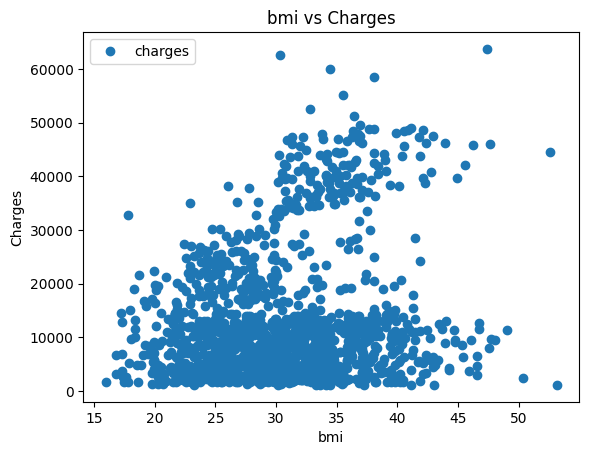

In [18]:
#Ploteamos el dataset
dataset.plot(x='bmi', y='charges', style="o")
plt.title('bmi vs Charges')
plt.xlabel('bmi')
plt.ylabel('Charges')
# plt.axvline(x=5,color='r')
plt.show()

Con dos variables no parece ser concluyente, crearemos un modelo de regresión múltiple para este caso

In [19]:
# 1 )Preparación de datos
X = dataset[['age', 'sex', 'bmi','children','smoker','region']]
y = dataset['charges']

In [20]:
# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# 'age', 'sex', 'bmi','children','smoker','region'
regressor.coef_

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04, -2.71284266e+02])

In [23]:
regressor.intercept_

-11946.606567263045

In [24]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [25]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [ ]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)
y_pred

In [27]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
764,9095.06825,8924.407244,170.661006,1.876413
887,5272.17580,7116.295018,-1844.119218,-34.978333
890,29330.98315,36909.013521,-7578.030371,-25.836264
1293,9301.89355,9507.874691,-205.981141,-2.214400
259,33750.29180,27013.350008,6736.941792,19.961136
...,...,...,...,...
109,47055.53210,39116.968669,7938.563431,16.870627
575,12222.89830,11814.555568,408.342732,3.340801
535,6067.12675,7638.107736,-1570.980986,-25.893327
543,63770.42801,40959.081722,22811.346288,35.771042


In [30]:
df.describe()

,Actual,Predicted,Sesgo,Error_porc
count,268.000000,268.000000,268.000000,268.000000
mean,12968.317063,13193.095706,-224.778643,-23.142536
std,12483.196202,10764.068923,5806.071850,65.304321
min,1131.506600,-1483.152818,-10585.848675,-417.362602
25%,4288.744850,5455.267306,-2952.786145,-48.553631
50%,8487.880300,10193.877080,-1232.231363,-19.734577
75%,16367.829375,15049.113521,1500.436658,16.161873
max,63770.428010,40959.081722,22811.346288,191.476966
